# Which science, according to the data?
## Most demanded topic in Data Science as per popular online forum

![banner](https://www.simplilearn.com/ice9/free_resources_article_thumb/Top_Data_Science_Facts.jpg)

## Abstract

In this project, we are to represent the interests of content creators for Data Science. We are tasked to search for the most popular topic within Data Science, according to online forum Data Science Stack Exchange. After extracting the data for the last year of 2022 and looking for the most common tags (topics) and combination of topics, we arrive at the conclusion that deep learning is the subject we are looking for. With a current frequency of demand of around 33% of the topics, its demand has been higher, but has plateaued in this significant figure for some time.

## Table of Contents

1. [**Introduction**](#section1)
2. [**Goals**](#section2)
3. [**Methodology and limitations**](#section3)
4. [**Data Overview and Fetching**](#section4)      
5. [**Data Exploration and preparation**](#section5)
6. [**Data Visualization and Analysis**](#section6)
7. [**Conclusion**](#section7)

## 1. Introduction<a name="section1"></a>


In this project, our company creates data science content in multiple media, such as boooks, online articles, videos and text-based platforms just like Dataquest.

Our department is tasked with delimiting what is the best content to write about. We decide to scavage the internet for what people want to learn about the most in data science.

We'll look into Stack Overflow, which is part of a website network called Stack Excahnge. More specifically, into Data Science Stack Exchange (DSSE), a dedicated site with lots of questions and answers posted by users (currently at 65% answered questions, in the bottom-10 websites). 

## 2. Goals <a name="section2"></a>

We'll deploy SQL and domain knowledge into DSSE database to determine:

1. What people want to learn about the most in Data Science?
2. Is it just a fad?


## 3. Methodology and limitations<a name="section3"></a>

We'll first extract our data of interest (2022) from the DSSE website through SQL. Then, we proceed to display the top 20 posted and seen subjects by tags, check which tags are not present in both lists, and finally create a matrix where we plot how often tags are combined, producing thus a 2D heatmap of frequency.

To analyze whether it is a fad or not, we download the full data from DSSE and compare the quarterly data to see how the demand for the most popular topic has evolved over time.

Limitations:
1. As this approach only measures frequency of combination between tag pairs, naturally the most popular tags will possess the stronger relationships.

2. Another simplification that can't be overlooked here is that we are only looking at pair relations, and not multiple groups of tags. It is possible that when tags are combined, (e.g. 'dataset' and 'scikit-learn') tags can have a strong relationship with another group (e.g. 'pandas'), but not individually.

## 4. Data Overview and Fetching<a name="section4"></a>
1. What kind of questions are welcome in this website?
2. What, other than questions, does the site's home page subdivide into?
3. What information is available in each post?

1. Close-ended, non-opinionated, specifically on-topic, unrepeated questions. Stack exchange is the most appropriate place to post questions which put statistical concepts into practice, focus on implementation and business processes.

2. The website [home page](https://datascience.stackexchange.com/) subdivides into:
* Questions - a list of all quesitons asked;
* Tags - a list of the labels that categorize questions,
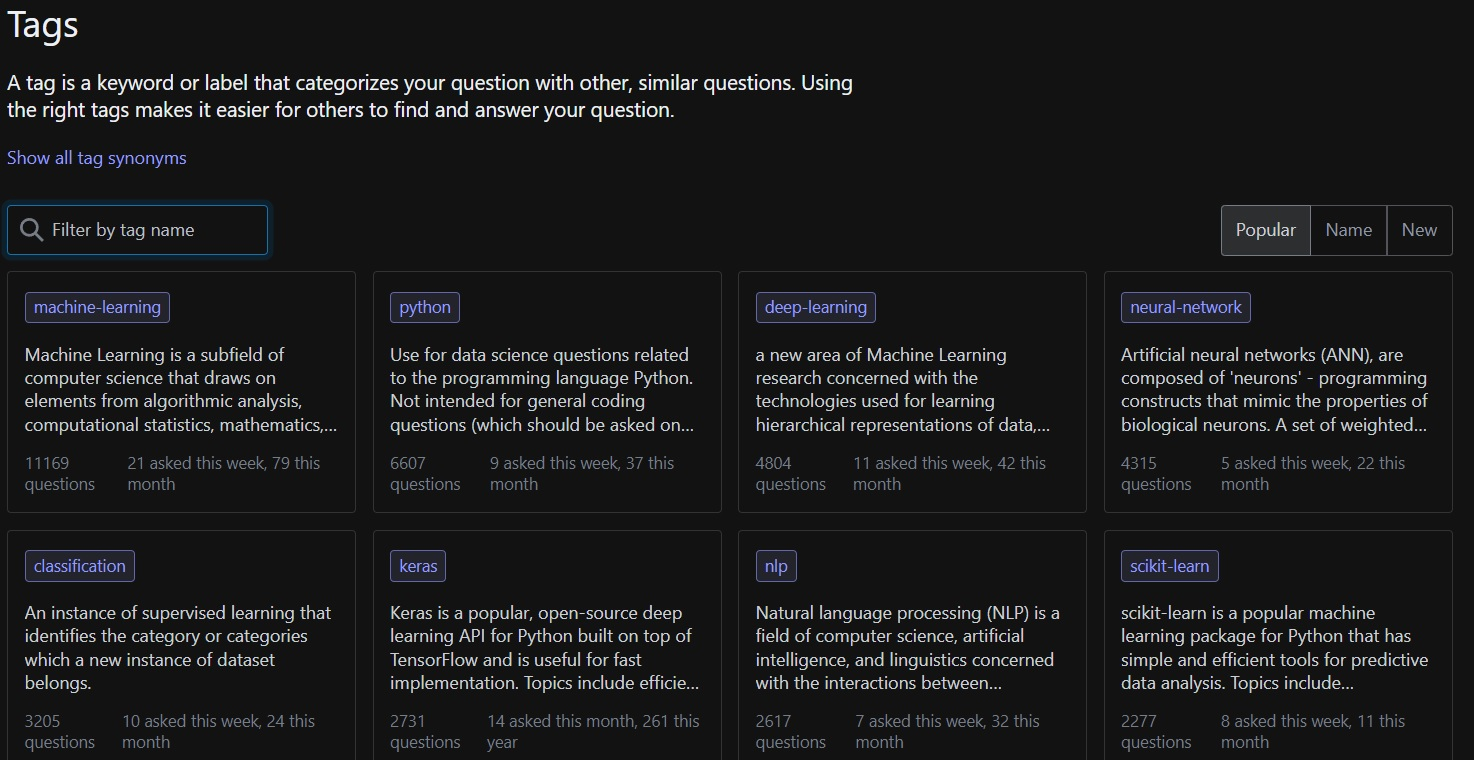
* Users -  a list of users,
* Companies - a list of companies and how it is to work for them
* Unaswered - a list of unaswered quesitons. 

3. Information available in each post:
* views;
* post date;
* last modification date;
* total vote score;
* post title;
* post author;
* post body.

*Extra information only available in question posts:

* how many answered;
* how many tags relate to subject;
* how many views;
* related questions

### Stack Exchange Data Explorer
Which tables look more promising towards finding the most popular content?

1. From those tables, the most interesting ones are:
* Posts: one entry/post, contains creation date, number of views, all tags, last modification, total vote score.
* PostType: we may need to sort posts by their types: question, answer, TagWikiExcerpt, TagWIki, ModeratorNomination, WikiPlaceholder,
* Tags: Overview of all tags, but no way to determine the time when posted;
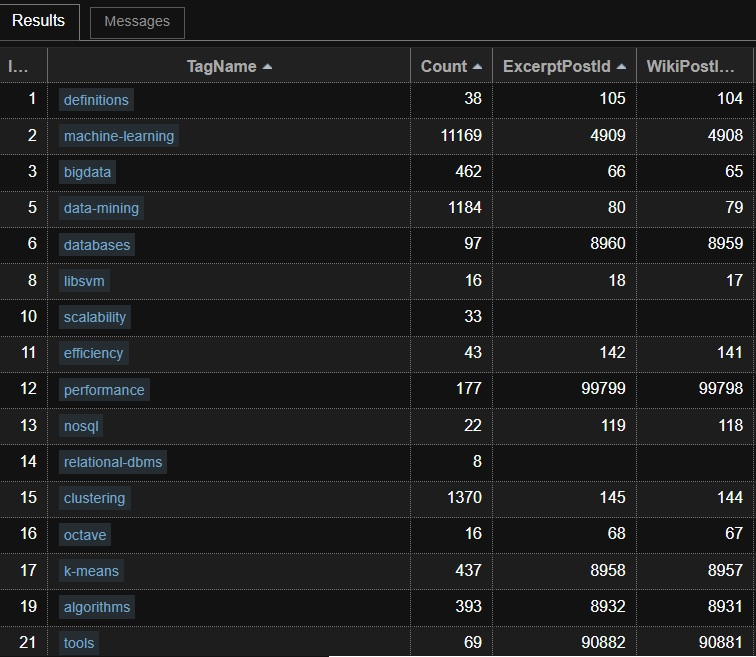
* PostTags: one entry for every post+tag combination
* TagSynonyms

### Getting the Data

There are 8 different types of posts, let's check which are relevant to us:
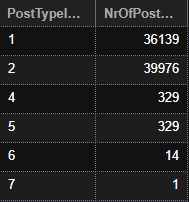

Due to low volumes otherwise, only questions and answers are of interest. Even if other types come to be huge successes, they will be outliers.

Since we are only interested in recent posts, we will select only those dated from 2022. 

We gather relevant data with the following query:

SELECT TOP 100
  Id,
  PostTypeId,
  CreationDate,
  Score,
  ViewCount,
  Tags,
  AnswerCount,
  FavoriteCount
 FROM Posts
WHERE PostTypeId = 1
AND YEAR(CreationDate) = 2022
ORDER BY Score DESC;

The last five columns,except for tags, give us information about popularity, as is our original goal. Here is the header for our table:

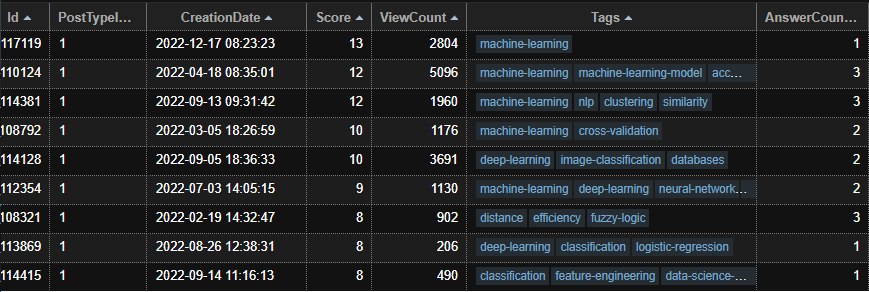

As this data is satisfactory, we can proceed to download it in .csv format and upload it in this notebook.

## 5. Data Exploration and preparation<a name="section5"></a>
1. Check for data type;
2. missing/repeated data;
3. data reasonableness;
4. most common qualifiers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [2]:
questions = pd.read_csv('myq.csv', parse_dates=['CreationDate'])

In [3]:
questions.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,117119,1,2022-12-17 08:23:23,13,2804,<machine-learning>,1,NaN
1,114381,1,2022-09-13 09:31:42,12,1960,<machine-learning><nlp><clustering><similarity>,3,NaN
2,110124,1,2022-04-18 08:35:01,12,5096,<machine-learning><machine-learning-model><acc...,3,NaN
3,108792,1,2022-03-05 18:26:59,10,1176,<machine-learning><cross-validation>,2,NaN
4,114128,1,2022-09-05 18:36:33,10,3691,<deep-learning><image-classification><databases>,2,NaN


In [4]:
#1. check for datatypes
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4609 entries, 0 to 4608
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             4609 non-null   int64         
 1   PostTypeId     4609 non-null   int64         
 2   CreationDate   4609 non-null   datetime64[ns]
 3   Score          4609 non-null   int64         
 4   ViewCount      4609 non-null   int64         
 5   Tags           4609 non-null   object        
 6   AnswerCount    4609 non-null   int64         
 7   FavoriteCount  18 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 288.2+ KB


First thing we ought to do is change the data to snake case, starting from the columns:

In [5]:
def camel_snake_converter(name):
    return re.sub(r'(?<!^)(?=[A-Z])', '_', name).lower()

questions.rename(camel_snake_converter, axis=1, inplace=True)

The data types seem correct for the most part, except for FavoriteCount, where we can have integers instead of floats. 

Given that 'object' dtype is a generalised term, we check what are indeed the contents of this column:


In [6]:
#1. check for data types
questions['tags'].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

So every value in this column is a string. They are, however, clustered together by '<' and '>' instead of for example, in a list.

In [7]:
#1. check for data types
questions['tags'] = questions['tags'].str.replace('^<|>$', '', regex=True).str.split('><')
questions.sample(5)

,id,post_type_id,creation_date,score,view_count,tags,answer_count,favorite_count
2295,111625,1,2022-06-07 19:14:30,0,51,"[predictive-modeling, optimization, data-analy...",1,NaN
2335,111563,1,2022-06-04 13:41:58,0,67,"[machine-learning, predictive-modeling, random...",2,NaN
2603,113155,1,2022-08-01 17:25:46,0,44,"[data-science-model, forecasting, hyperparamet...",0,NaN
1441,109437,1,2022-03-28 21:00:16,1,16,"[classification, ranking, auc, roc]",0,NaN
2311,111614,1,2022-06-07 07:44:50,0,16,"[machine-learning, classification, feature-sel...",0,NaN


Text(0.5, 23.38159722222222, 'Columns')

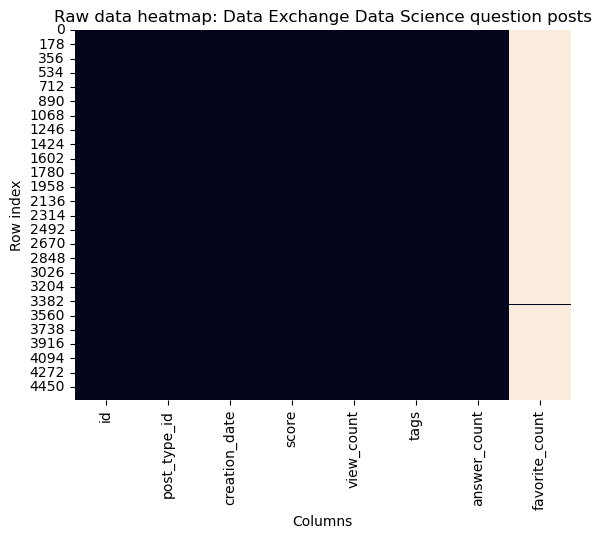

In [8]:
#2. missing/repeated values
sns.heatmap(questions.isnull(), cbar=False)
plt.title('Raw data heatmap: Data Exchange Data Science question posts')
plt.ylabel('Row index')
plt.xlabel('Columns')

At first glance, there seems to be no missing data except for the 'FavoriteCount' column, which is missing 4591 values, or 99.61%. Missing values probably mean that the post is not on anybody's favorite list, so it can be replaced by 0.

In [9]:
#2 missing/repeated data
questions.fillna(value={'favorite_count':0}, inplace=True)
questions['favorite_count'] = questions['favorite_count'].astype(int)
questions.dtypes

id                         int64
post_type_id               int64
creation_date     datetime64[ns]
score                      int64
view_count                 int64
tags                      object
answer_count               int64
favorite_count             int32
dtype: object

In [10]:
#2. missing/repeated
len(questions['id'].unique())

4609

There are no repeated entries.

In [11]:
#3. data reasonableness 
questions.describe()

,id,post_type_id,score,view_count,answer_count,favorite_count
count,4609.000000,4609.0,4609.000000,4609.000000,4609.000000,4609.000000
mean,112668.165329,1.0,0.499024,179.651334,0.634845,0.000217
std,3018.843498,0.0,0.959493,494.328181,0.719043,0.014730
min,106600.000000,1.0,-4.000000,2.000000,0.000000,0.000000
25%,110256.000000,1.0,0.000000,23.000000,0.000000,0.000000
50%,112977.000000,1.0,0.000000,44.000000,1.000000,0.000000
75%,115264.000000,1.0,1.000000,127.000000,1.000000,0.000000
max,117434.000000,1.0,13.000000,8260.000000,6.000000,1.000000


The data seems reasonable overall.

## 6. Data Visualization and Analysis<a name="section6"></a>

1. How many times a tag was used and viewed
2. Divergent items in both lists
3. Relations between tags
4. How has this interest evolved over time? Is it just a fad?

### 6.1. How many times a tag was used

In [12]:
tag_count = dict()

for tags in questions['tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] +=1
        else:
            tag_count[tag]=1
            
tag_count = pd.DataFrame.from_dict(tag_count, orient='index')
tag_count.rename(columns={0:'tag_count'}, inplace=True)
most_used = tag_count.sort_values(by='tag_count').tail(20)

In [13]:
tag_view_count = dict()

for idx, row in questions.iterrows():
    for tag in row['tags']:
        if tag in tag_view_count:
            tag_view_count[tag]+=row['view_count']
        else:
            tag_view_count[tag]=row['view_count']
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient='index')
tag_view_count.rename(columns={0:'view_count'}, inplace=True)

most_viewed = tag_view_count.sort_values(by='view_count').tail(20)



Text(0.5, 1.0, 'Top 20 most viewed tags in DE 2022')

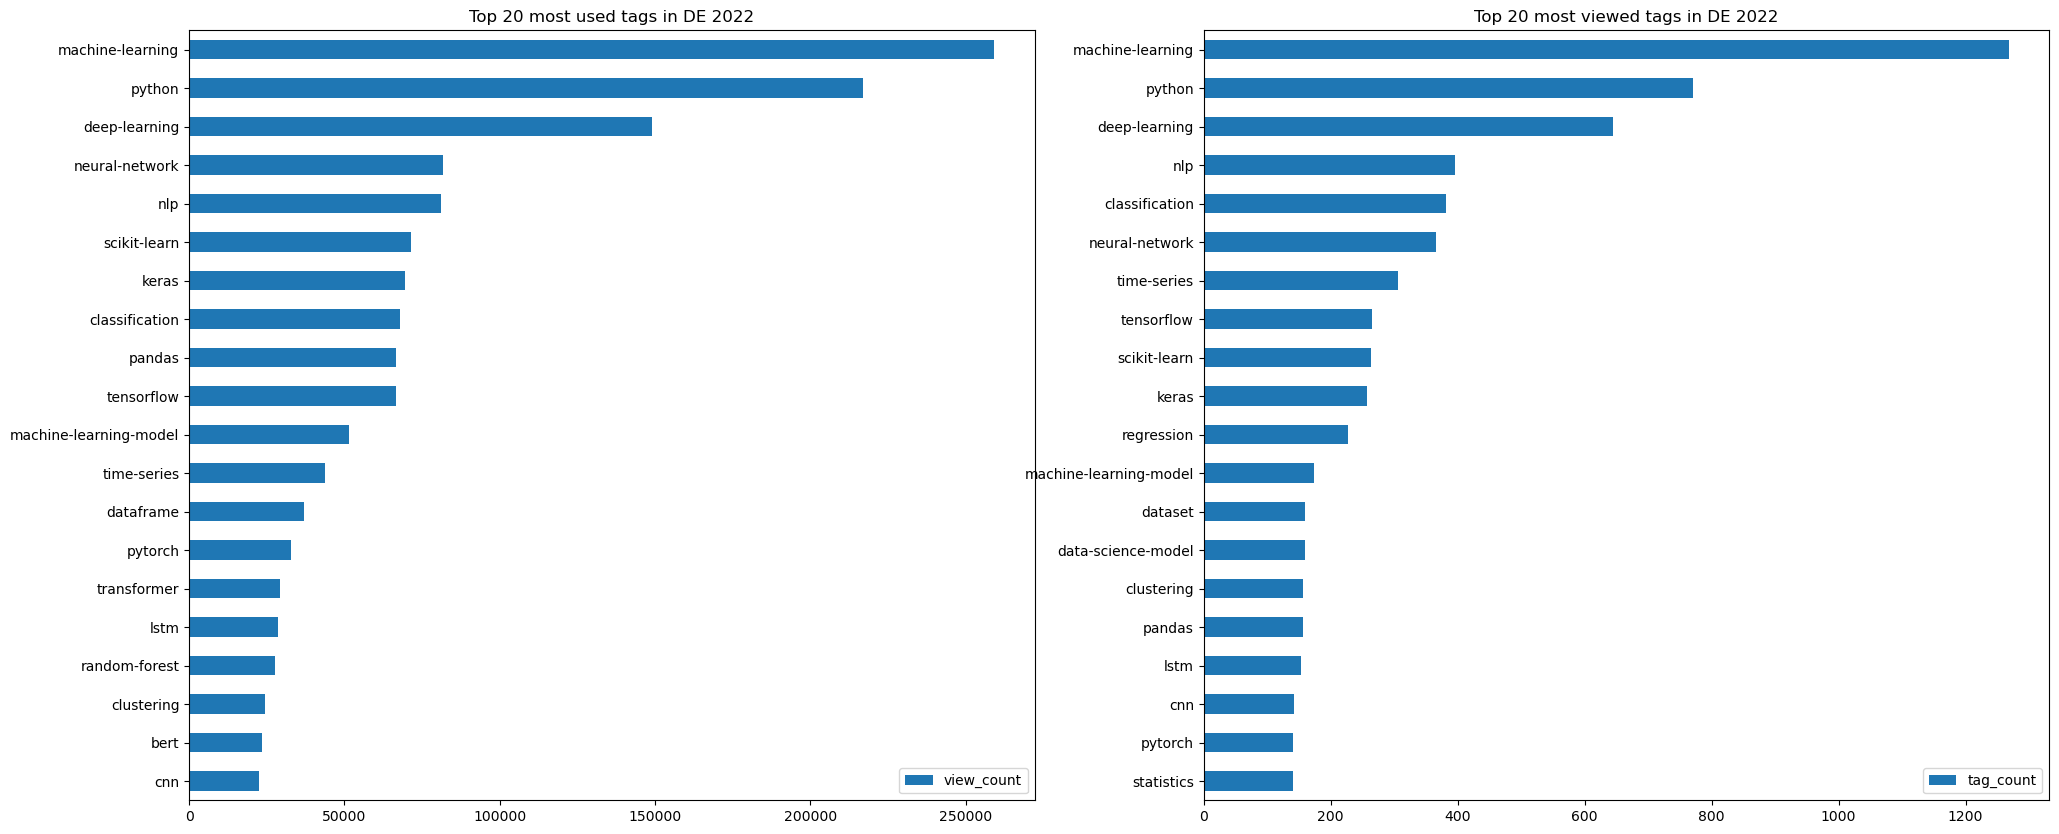

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24,10))
most_viewed.plot(kind='barh', ax=axs[0])
most_used.plot(kind='barh', ax=axs[1])
axs[0].set_title('Top 20 most used tags in DE 2022')
axs[1].set_title('Top 20 most viewed tags in DE 2022')



So we can confirm tags are posted in a proportional frequency as to their views, with a few exceptions.

###  6.2 Divergent items in both lists

In [15]:
#Checking unique tags in both lists:
#only in most_used:
in_viewed = pd.merge(most_used, most_viewed, how='right', left_index=True, right_index=True)
in_viewed

,tag_count,view_count
cnn,142.0,22425
bert,NaN,23442
clustering,156.0,24334
random-forest,NaN,27632
lstm,154.0,28568
transformer,NaN,29271
pytorch,140.0,32936
dataframe,NaN,37099
time-series,306.0,43896
machine-learning-model,174.0,51469


dataframe, transformer, random-forest and bert are among most viewed, but not among most used tags.

In [16]:
in_used = pd.merge(most_used, most_viewed, how='left', left_index=True, right_index=True)
in_used

,tag_count,view_count
statistics,140,NaN
pytorch,140,32936.0
cnn,142,22425.0
lstm,154,28568.0
pandas,156,66746.0
clustering,156,24334.0
data-science-model,159,NaN
dataset,160,NaN
machine-learning-model,174,51469.0
regression,228,NaN


Statistics, Data Science model, dataset, regression are among most used tags, but not among most viewed.

### 6.3 Relations between variables

We can gauge how pairs of tags relate by counting how often they appear together. By creating a list of tags:

In [17]:
all_tags = list(tag_count.index)
tag_matrix = pd.DataFrame(index=all_tags, columns=all_tags)
tag_matrix.iloc[0:4,0:4]

,machine-learning,nlp,clustering,similarity
machine-learning,NaN,NaN,NaN,NaN
nlp,NaN,NaN,NaN,NaN
clustering,NaN,NaN,NaN,NaN
similarity,NaN,NaN,NaN,NaN


In [18]:
tag_matrix.fillna(0, inplace=True)

for tags in questions['tags']:
    tag_matrix.loc[tags, tags]+=1

In [19]:
tag_matrix.head(5)

,machine-learning,nlp,clustering,similarity,machine-learning-model,accuracy,model-evaluations,cross-validation,deep-learning,image-classification,...,mean,rasa-nlu,crawling,umap,stata,kedro,data-source,share-point,dictionary,duplicate
machine-learning,1268,110,44,4,76,18,25,20,243,13,...,1,0,0,0,0,1,0,0,0,0
nlp,110,396,16,6,4,1,3,2,84,2,...,0,0,0,0,0,0,0,0,0,0
clustering,44,16,156,7,4,0,2,0,5,1,...,0,0,0,0,0,0,0,0,0,0
similarity,4,6,7,34,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
machine-learning-model,76,4,4,0,174,6,6,4,28,4,...,0,0,0,0,0,0,0,0,0,0


In [20]:
tag_matrix_most_used = tag_matrix.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["data-science-model", "regression"] = "background-color: yellow"
    helper_df.loc["regression", "data-science-model"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

tag_matrix_most_used.style.apply(style_cells, axis=None)

,statistics,pytorch,cnn,lstm,pandas,clustering,data-science-model,dataset,machine-learning-model,regression,keras,scikit-learn,tensorflow,time-series,neural-network,classification,nlp,deep-learning,python,machine-learning
statistics,140,0,0,1,2,7,6,3,6,15,0,2,0,10,2,10,1,8,10,42
pytorch,0,140,11,7,1,4,2,1,3,3,5,2,8,7,18,3,16,39,29,22
cnn,0,11,142,3,0,1,1,3,1,9,25,0,25,5,15,10,2,42,20,25
lstm,1,7,3,154,1,0,4,2,1,7,36,2,21,49,25,5,17,33,22,39
pandas,2,1,0,1,156,1,3,9,0,7,2,18,1,6,0,3,2,3,77,17
clustering,7,4,1,0,1,156,5,3,4,5,0,7,0,11,0,10,16,5,30,44
data-science-model,6,2,1,4,3,5,159,11,21,10,5,13,5,9,5,10,6,18,32,73
dataset,3,1,3,2,9,3,11,160,6,6,3,4,4,4,8,10,14,10,26,44
machine-learning-model,6,3,1,1,0,4,21,6,174,6,6,14,7,6,13,21,4,28,22,76
regression,15,3,9,7,7,5,10,6,6,228,9,18,4,18,20,18,0,20,21,62


Cells highlighted in yellow show us that 'regression' was tagged 10 times with 'data-science-model', whereas the numbers highlighted in blue mean the total of times each tag appears in the full dataframe.

For better visualization, here follows a heatmap of the table above, excluding the blue (total frequency)values.

In [21]:
for t in range(tag_matrix_most_used.shape[0]):
    tag_matrix_most_used.iloc[t,t] = np.nan

<Axes: >

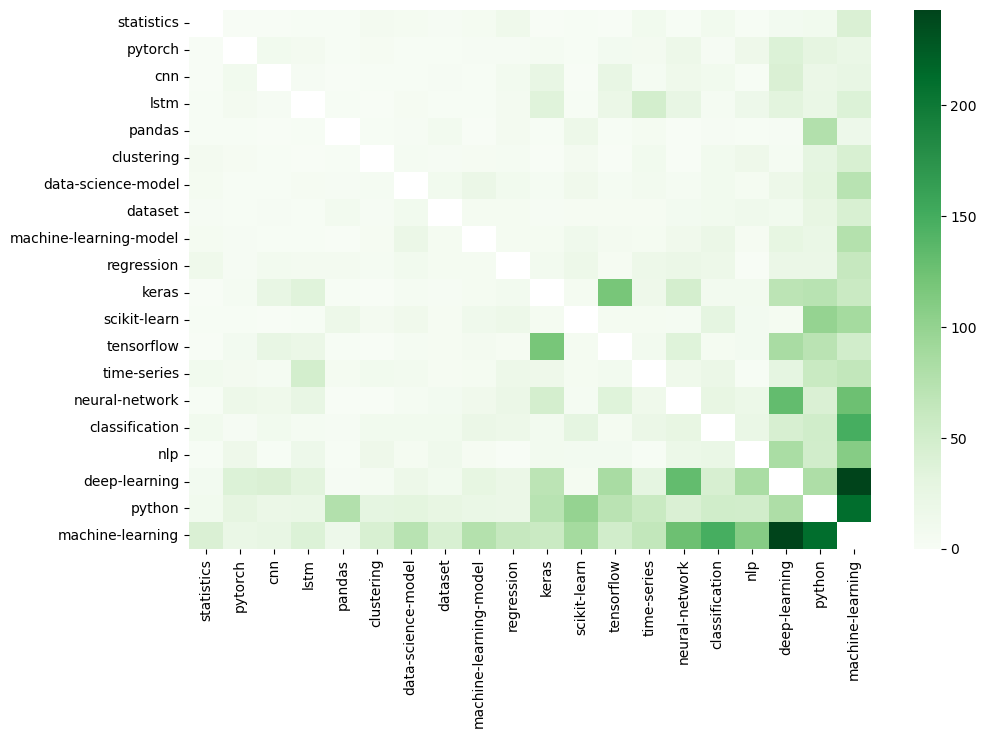

In [22]:
plt.figure(figsize=(11,7))
sns.heatmap(tag_matrix_most_used, cmap='Greens', annot=False)


As this approach only measures frequency of combination between tag pairs, naturally the most popular tags will possess the stronger relationships.

Another simplification that can't be overlooked here is that we are only looking at pair relations, and not multiple groups of tags. It is possible that when tags are combined, (e.g. 'dataset' and 'scikit-learn') tags can have a strong relationship with another group (e.g. 'pandas'), but not individually.

To overcome these limitations, we can use association rules, which we'll cover next topic.

With domain knowledge, however, we can see that Keras, Scikit-learn and Tensor-Flow are python libraries that allow their users to employ deep learning - a species within neural network.

So we can say, 'deep learning is the most popular topic at the moment'.

### 6.4 How has this interest evolved over time? Is it just a Fad?

Let's look into the whole dataframe to determine whether 'deep-learning' is just a fad. We dowload the csv file for all questions from SEDE with the following query:

SELECT Id, CreationDate, Tags

  FROM posts
  
 WHERE PostTypeId = 1;
 
 and upload it here next.

In [23]:
all_q = pd.read_csv('all_q.csv', parse_dates=['CreationDate'])

In [24]:
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "", regex=True).str.split("><")

The following tags will be considered deep-learning: ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]. We can create a function that filters deep-learning questions with 1's and 0's:

In [25]:
def is_deep(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [26]:
all_q['DeepLearning']=all_q['Tags'].apply(is_deep)
all_q.sample(3)

,Id,CreationDate,Tags,DeepLearning
28323,55017,2019-07-03 22:09:12,"[machine-learning, python, bigdata]",0
15250,65262,2019-12-22 05:00:41,"[data, apache-hadoop]",0
5225,71880,2020-04-06 23:29:00,"[python, scikit-learn, aws, sagemaker]",1


Let's analyze all quarter in the available data, ecluding the current year 2023.

In [27]:
all_q = all_q[all_q['CreationDate'].dt.year < 2023]



In [28]:
#Creating a column to id the quarter in which a question was asked:
def get_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1)//3)+1)
    return f'{year}Q{quarter}'

all_q['Quarter'] = all_q['CreationDate'].apply(get_quarter)
all_q.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,9823,2016-01-17 18:26:54,"[python, neural-network, deep-learning, keras,...",1,16Q1
1,9826,2016-01-18 05:37:40,"[deep-learning, information-retrieval, word-em...",1,16Q1
2,9827,2016-01-18 08:18:54,"[python, scikit-learn]",1,16Q1
3,9832,2016-01-18 13:51:25,"[machine-learning, reinforcement-learning]",0,16Q1
4,9839,2016-01-18 19:48:29,"[data-mining, predictive-modeling, bayesian-ne...",0,16Q1


We can finally group by quarter and:
* Count the number of deep learning questions;
* Count the total number of questions;
* Compute the ratio above.

In [29]:
quarterly = all_q.groupby('Quarter').agg({'DeepLearning': ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly['DeepLearningRate']=quarterly['DeepLearningQuestions']/quarterly["TotalQuestions"]

quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
23,20Q1,637,1775,0.358873
25,20Q3,547,1430,0.382517
6,15Q4,66,379,0.174142
10,16Q4,176,518,0.339768
13,17Q3,246,707,0.347949


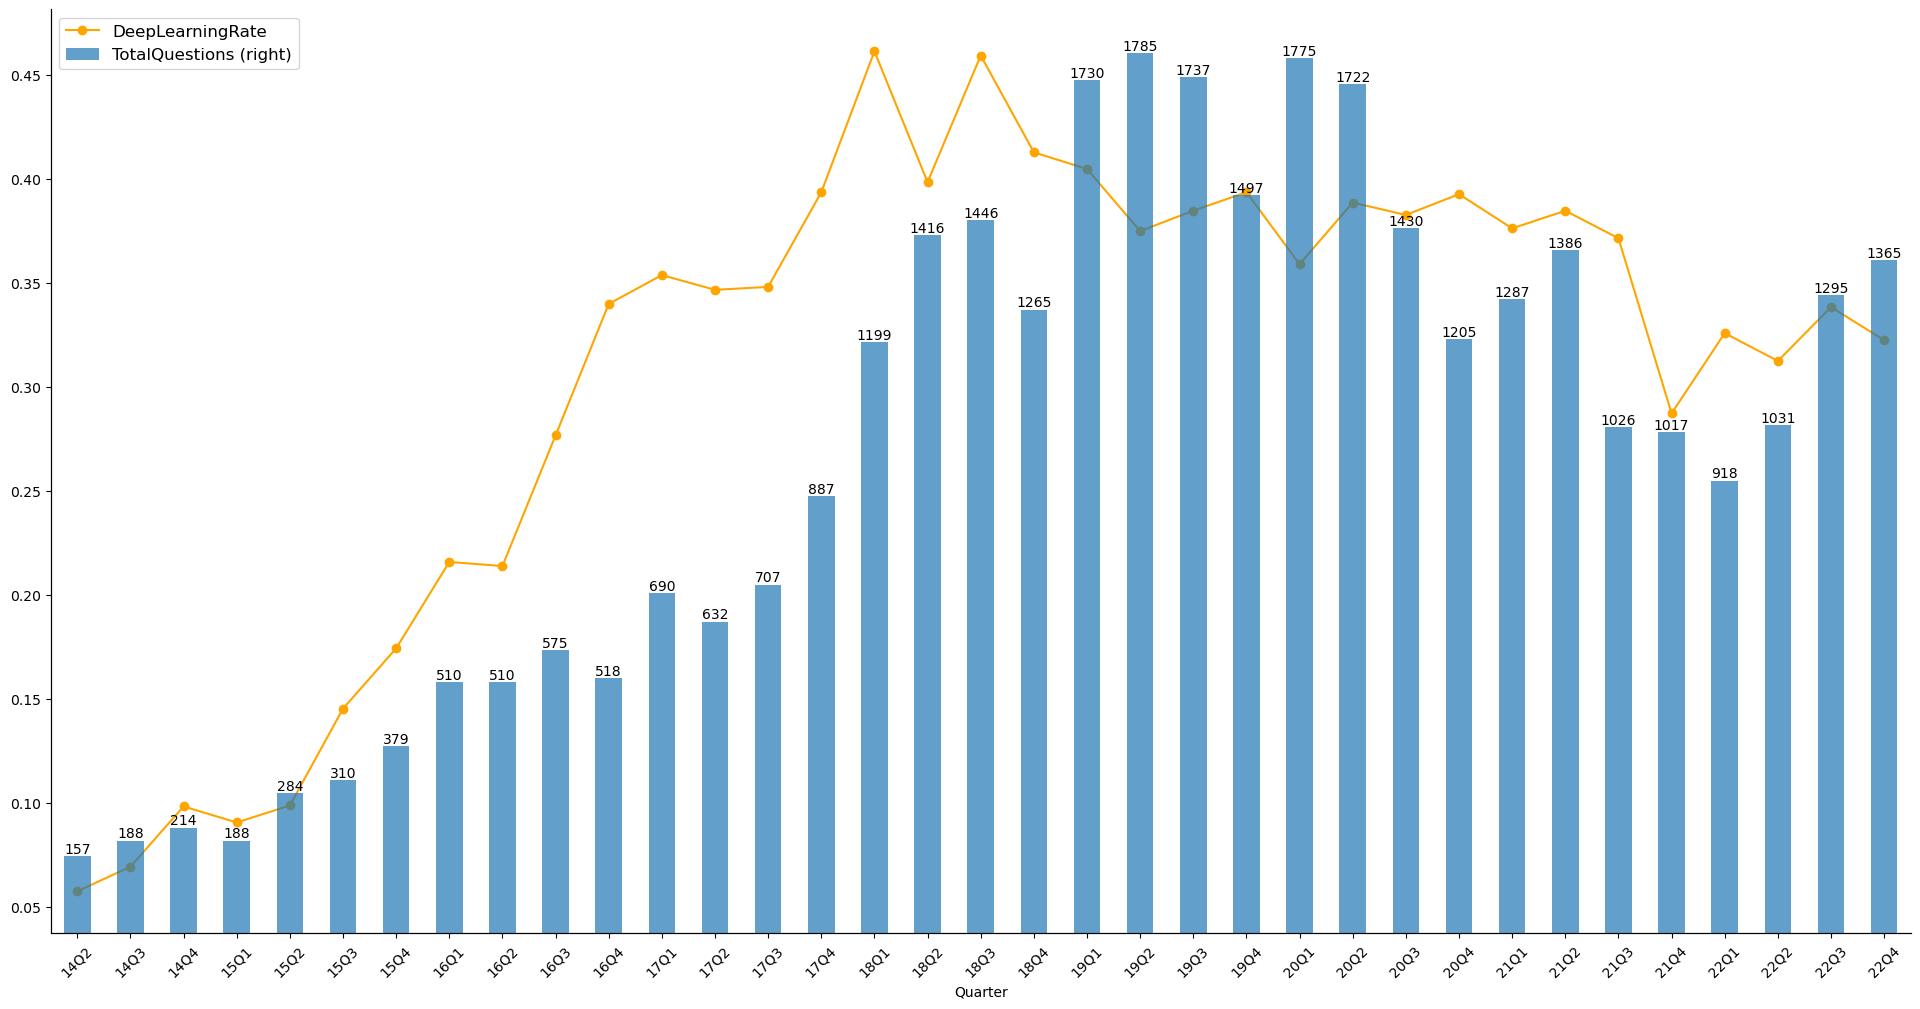

In [30]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].items():#.iteritems()
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

It seems that deep learning had a fad period between '19 and '20 and now has plateauded, still in high levels of interest in the community. Thus, we can propose to create deep-learning content.

## 7. Conclusion<a name="section7"></a>

In this project, we set out to investigate which was the most demanded topic within Data Science for the last year of 2022 according to posts in a specialized Data Sceince online forum. With SQL to extract the data of interest and domain knowledge, we could extract insights from the combined data of  most posted and most visited topics (separated by tag) and conclude that the most popular tags indicate that deep learning is the overall most demanded topic. Furthermore, we could check that over the years, deep learning has peaked between 2019 and 2020, plateauing, however, at a very high frequency ever since, around 33%.


Next steps:
* What other content can we recommend that isn't as popular? You can try using association rules to find strong relations between tags.
* What other popularity features could we include in our analysis? Perhaps scores and favourite counts?
* We focused on DSSE. How could we use other related sites to help us with our goal?
* How can we leverage other sites to determine what non-data-science content to write about? For example, is there some mathematical field that leads to more questions than others?